# Grade: /100 pts

# Assignment 7: Tree methods

In this assignment you'll study tree methods. You will use a dataset that contains the premier league (soccer) matches between 2010 and 2021. The data has the following variables:

|#|Attribute|Description|
|---|---|---|
|0|home_team|home team|
|1|away_team|away team|
|2|result_full|match result|
|3|home_clearances|home team clearances in the match|
|4|home_corners|home team corners in the match|
|5|home_fouls_conceded|home team fouls conceded in the match|
|6|home_offsides|home team offsides in the match|
|7|home_passes|home team passes in the match|
|8|home_possession|home team possession in the match|
|9|home_red_cards|home team red cards in the match|
|10|home_shots|home team shots in the match|
|11|home_shots_on_target|home team shots on target in the match|
|12|home_tackles|home team tackles in the match|
|13|home_touches|home team touches in the match|
|14|home_yellow_cards|home team yellow cards in the match|
|15|away_clearances|away tem clearances in the match|
|16|away_corners|away team corners in the match|
|17|away_fouls_concedevd|away team fouls conceded in the match|
|18|away_offsides|away team offsides in the match|
|19|away_passes|away team passes in the match|
|20|away_possession|away team possession in the match|
|21|away_red_cards|away team red cards in the match|
|22|away_shots|away team shots in the match|
|23|away_shots_on_target|away team shots on target in the match|
|24|away_tackles|away team tackles in the match|
|25|away_touches|away team touches in the match|
|26|away_yellow_cards|away team yellow cards in the match|
|27|clearances_avg_home|average home team clearances in the season; accumulated until the last match|
|28|corners_avg_home|average home team corners in the season; accumulated until the last match|
|29|fouls_conceded_avg_home|average home team fouls conceded in the season; accumulated until the last match|
|30|offsides_avg_home|average home team offsides in the season; accumulated until the last match|
|31|passes_avg_home|average home team passes in the season; accumulated until the last match|
|32|possession_avg_home|average home team possession in the season; accumulated until the last match|
|33|red_cards_avg_home|average home team red cards in the season; accumulated until the last match|
|34|shots_on_target_avg_home|average home team shots on target in the season; accumulated until the last match|
|35|tackles_avg_home|average home team tackles in the season; accumulated until the last match|
|36|touches_avg_home|average home team touches in the season; accumulated until the last match|
|37|yellow_cards_avg_home|average home team yellow cards in the season; accumulated until the last match|
|38|goals_scored_ft_avg_home|average home team goals scored in the season; accumulated until the last match|
|39|goals_conced_ft_avg_home|average home team goals conceded in the season; accumulated until the last match|
|40|sg_match_ft_acum_home|goals difference in the season; accumulated until the last match|
|41|goals_scored_ht_avg_home|average home team goals scored in 1st time in the season; accumulated until the last match|
|42|goals_conced_ht_avg_home|average home team goals conceded in 1st time in the season; accumulated until the last match|
|43|clearances_avg_away|average away team clearances in the season; accumulated until the last match|
|44|corners_avg_away|average away team corners in the season; accumulated until the last match|
|45|fouls_conceded_avg_away|average away team fouls conceded in the season; accumulated until the last match|
|46|offsides_avg_away|average away team offsides in the season; accumulated until the last match|
|47|passes_avg_away|average away team passes in the season; accumulated until the last match|
|48|possession_avg_away|average away team possession in the season; accumulated until the last match|
|49|red_cards_avg_away|average away team red cards in the season; accumulated until the last match|
|50|shots_on_target_avg_away|average away team shots on target in the season; accumulated until the last match|
|51|tackles_avg_away|average away team tackles in the season; accumulated until the last match|
|52|touches_avg_away|average away team touches in the season; accumulated until the last match|
|53|yellow_cards_avg_away|average away team yellow cards in the season; accumulated until the last match|
|54|goals_scored_ft_avg_away|average away team goals scored in the season; accumulated until the last match|
|55|goals_conced_ft_avg_away|average away team goals conceded in the season; accumulated until the last match|
|56|sg_match_ft_acum_away|goals difference in the season; accumulated until the last match|
|57|goals_scored_ht_avg_away|average away team goals scored in 1st time in the season; accumulated until the last match|
|58|goals_conced_ht_avg_away|average away team goals conceded in 1st time in the season; accumulated until the last match|

*Do not forget to include labels in your figures.*

*Take advantage of `n_jobs=-1` where applicable.*

### <span style="color:yellow"> Global Toolbox </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk 
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

import pydotplus 
from sklearn.tree import export_graphviz
from IPython.display import Image

import warnings; warnings.filterwarnings('ignore')
seed = 310
np.random.seed(seed)

### Q1.1 - <span style="color:red">[4]</span> - Load and clean the dataset:

1. Load the dataset.
2. Drop all the variables that you would not have known prior to the match, except for the goals.
3. Store the shape of the dataframe in a variable called <span style="color:pink">**shape_vector**</span>.

**Points will be deducted if your answer is not in the variable mentioned above**

In [2]:
#

# load dataset
data_set = pd.read_csv('PL_matches.csv')

# remove features that we do not know prior to match exept the number of goals
drop_columns_names = data_set.columns[3:27].tolist() 
data_set_drop_match_info = data_set.drop(columns=drop_columns_names)

# shape of the new dataframe
shape_vector = data_set_drop_match_info.shape

print('Shape of dataframe after modifiying the dataset: {}'.format(shape_vector))

data_set_drop_match_info.head(4)

Shape of dataframe after modifiying the dataset: (3957, 35)


,home_team,away_team,result_full,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,...,red_cards_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away
0,Blackpool,West Bromwich Albion,2-1,38.4,4.6,11.3,3.4,407.9,48.3,0.1,...,0.1,4.1,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78
1,Liverpool,Manchester City,3-0,29.8,5.6,12.3,2.2,440.1,52.7,0.1,...,0.2,4.6,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32
2,Manchester United,Arsenal,1-0,29.1,6.1,10.8,2.9,517.3,57.6,0.0,...,0.2,6.3,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38
3,Stoke City,Aston Villa,2-1,32.3,4.0,13.7,2.0,256.0,35.7,0.0,...,0.0,3.3,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00


### Q1.2 - <span style="color:red">[10]</span> - Create the target variable:

1. Create a new variable (column) in the dataset called "target", which will be the target for our classification. This variable will be "0" if the home team scored more goals than away team, "1" if the away scored more, and "2" if they scored the same number of goals. 
2. In which game was the greatest goal difference? What was the result of the game? Store the home team of the game in **home_team**, away in **away_team** and result in **game_result**.
3. Drop all variables related to the  result of the game including the name of the teams, except for the target.
4. **Written question:** Is this dataset balanced? Why? Write no more than 2 lines.

**Hint:** To create the target variable you should use the split function from pandas. Take a look to the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html).


**Points will be deducted if your answer is not in the variable names mentioned above.**

In [3]:
#

# split result_full feature by '-'
goals_both_team = data_set_drop_match_info['result_full'].str.split('-')

# absolute difference of goals
abs_difference = goals_both_team.map(lambda row_i: np.abs(int(row_i[0])-int(row_i[1])))

# match with greatest goal difference
index_of_greatest_difference = abs_difference.argmax()
home_team = data_set_drop_match_info.loc[index_of_greatest_difference, 'home_team']
away_team = data_set_drop_match_info.loc[index_of_greatest_difference, 'away_team']
game_result = data_set_drop_match_info.loc[index_of_greatest_difference, 'result_full']

print('Game with maximum goal difference:\n>    Home-Team: {}\n>    Away-Team: {}\n>    Match-Result: {}'.format(home_team, away_team, game_result))

# assign 0, 1, 2 according to goals
series_target = pd.Series(data=[0] * shape_vector[0])
for row_i in range(shape_vector[0]):
    if goals_both_team[row_i][0] > goals_both_team[row_i][1]:
        series_target[row_i] = 0
    elif goals_both_team[row_i][0] < goals_both_team[row_i][1]:
        series_target[row_i] = 1
    elif goals_both_team[row_i][0] == goals_both_team[row_i][1]:
        series_target[row_i] = 2

# add target column to the dataframe
data_set_with_target = pd.concat([data_set_drop_match_info, pd.DataFrame(data=series_target, columns=['target'])], axis=1)

# drop features {result_full, home_team, away_team}
data_set_with_target.drop(columns=['result_full', 'home_team', 'away_team'], inplace=True)

print('\nNumber of each class:\n{}'.format(data_set_with_target.target.value_counts()))
print('Baseline Accuracy: {}'.format((1795)/(1795 + 1189 + 973)))

data_set_with_target.head(5)


Game with maximum goal difference:
>    Home-Team: Southampton
>    Away-Team: Leicester City
>    Match-Result: 0-9

Number of each class:
0    1795
1    1189
2     973
Name: target, dtype: int64
Baseline Accuracy: 0.4536264847106394


,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,...,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,target
0,38.4,4.6,11.3,3.4,407.9,48.3,0.1,4.4,18.8,619.1,...,4.1,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,0
1,29.8,5.6,12.3,2.2,440.1,52.7,0.1,5.3,24.0,659.5,...,4.6,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,0
2,29.1,6.1,10.8,2.9,517.3,57.6,0.0,5.6,17.3,726.1,...,6.3,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,0
3,32.3,4.0,13.7,2.0,256.0,35.7,0.0,4.0,18.3,442.0,...,3.3,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0
4,38.7,5.0,12.1,2.9,446.8,51.6,0.0,4.5,21.3,669.1,...,6.3,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,2


**Written Answer: It is not a balanced dataset, because the number of members of different classes are higly different.**

Number of each class:

Class 0:    1795

Class 1:    1189

Class 2:     973

### Q1.3 - <span style="color:red">[4]</span> - Correlation:

- Compute pairwise Pearson correlation coefficient (PCC) of columns and report only those with pairwise correlation absolute value greater than 0.9. The table below illustrates how the output of your code should look like. It is just for illustration and its number of rows (i.e., 3) is not deterministic. (We are checking pairwise correlations amongst the variables - and not each variable with respect to target.) 

|Index|Variable 1|Variable 2|PCC|
|---|---|---|---|
|137|passes_avg_home|possession_avg_home|0.935083|
|...|...|...|...|
|...|...|...|...|

  
- **Written question:** Using common sense and your understanding of the attributes, can you tell why are these variables correlated? Write no more than 5 sentences.

- In the pairwise PCCs, identify those variables without the term "possession" in their names and drop them from the dataframe.


In [4]:
# PCC correlation 
corr_df = data_set_with_target.corr(method='pearson')

variable_1 = []
variable_2 = []
pcc = []

# just keep correlation among variable, delete correlation with target, 
# delete correlation of a feature with itself
for i in range(corr_df.shape[0]):
    for j in range(i + 1, corr_df.shape[1]-1):
       variable_1.append(corr_df.index[i])
       variable_2.append(corr_df.columns[j])
       pcc.append(corr_df.loc[corr_df.index[i], corr_df.columns[j]]) 

# create the dataframe mentioned in question
corr_df = pd.DataFrame({'Variable 1': variable_1, 'Variable 2': variable_2, 'PCC': pcc})

# keep does with abosulte value greater that 0.9
corr_df_0_9 = corr_df[corr_df.PCC.abs() > 0.9]

print('\n>    Correlation dataframe with absoulte correlation more than 0.9:')
print(corr_df_0_9)

# delete features that do not contain possession in them and have high correlation with possesion
data_set_with_target = data_set_with_target.drop(columns=['passes_avg_home', 'touches_avg_home', 'passes_avg_away', 'touches_avg_away'])
data_set_with_target.head()


>    Correlation dataframe with absoulte correlation more than 0.9:
              Variable 1           Variable 2       PCC
118      passes_avg_home  possession_avg_home  0.935083
122      passes_avg_home     touches_avg_home  0.990809
148  possession_avg_home     touches_avg_home  0.950461
430      passes_avg_away  possession_avg_away  0.934452
434      passes_avg_away     touches_avg_away  0.990702
444  possession_avg_away     touches_avg_away  0.949458


,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,possession_avg_home,red_cards_avg_home,shots_on_target_avg_home,tackles_avg_home,yellow_cards_avg_home,goals_scored_ft_avg_home,...,red_cards_avg_away,shots_on_target_avg_away,tackles_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,target
0,38.4,4.6,11.3,3.4,48.3,0.1,4.4,18.8,1.2,1.44,...,0.1,4.1,20.0,1.6,1.44,1.67,-2.0,0.33,0.78,0
1,29.8,5.6,12.3,2.2,52.7,0.1,5.3,24.0,1.6,1.35,...,0.2,4.6,22.0,2.0,1.61,0.87,23.0,0.87,0.32,0
2,29.1,6.1,10.8,2.9,57.6,0.0,5.6,17.3,1.6,2.33,...,0.2,6.3,21.2,1.8,2.12,1.12,16.0,0.94,0.38,0
3,32.3,4.0,13.7,2.0,35.7,0.0,4.0,18.3,2.3,0.67,...,0.0,3.3,25.0,2.0,1.33,2.00,-2.0,1.00,1.00,0
4,38.7,5.0,12.1,2.9,51.6,0.0,4.5,21.3,1.1,1.08,...,0.0,6.3,19.4,1.4,1.84,0.88,24.0,0.84,0.48,2


Written Answer: It is logical that passes_avg_* and possession_avg_* have high correlation. Longer possesion of the ball means players of the team had the ball more inside their team which increase the probability of more passes. There is the same thing between passes_avg_* and touches_avg_*, a touch can lead to pass, shot, dribles, etc. More touch means more prabability for pass. In the same way, higher possession means the players of a team had the ball more and they did various things such as shot, pass, touches, etc. 

### Q2.1 - <span style="color:red">[40]</span> - Random Forest
- Separate the data into X and y, X should have the predictors and y the target

- Create train and test set with 30% of the data in the test set. Use the provided random seed.

- Instantiate three [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.get_params) each with a different method of selection for argument ```max_features```, *i.e.*, "sqrt", "log2", "None". Train them in a `for` loop with the number of trees in the range of 3 to 263 inclusive with step size of 20. Then, plot their OOB scores against number of trees in the forest for each classifier. Which selection method yields a better generalization score?

- Obtain the accuracy and the confusion matrix of the model with the best OOB rate. Store the accuracy in a variable called **accuracy1**.

- Visualize one arbitrary tree from one of the forests.

- **Written question:** Is this a good model? Write no more than 5 sentences.

**Points will be deducted if your answer is not in the variable names mentioned above.**

**Use random_state = seed in all the methods that take this argument.**

Average of sqrt: 0.4997936335964505
Average of log2: 0.4958984677294537
Average of None: 0.4915905690553578

>  Accuracy on test set for best model: 0.5193602693602694

>  Confusion Matrix for best model:
 [[408  89  34]
 [143 184  37]
 [177  91  25]]


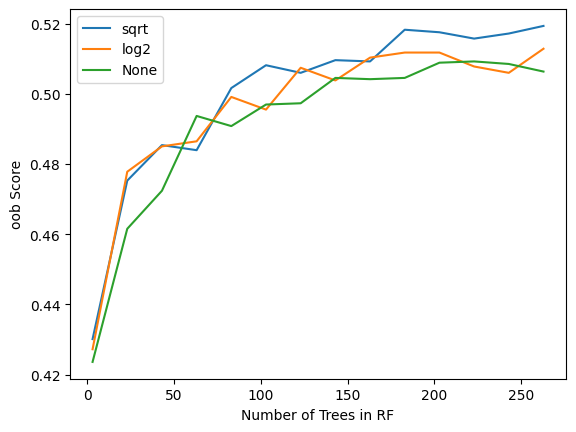

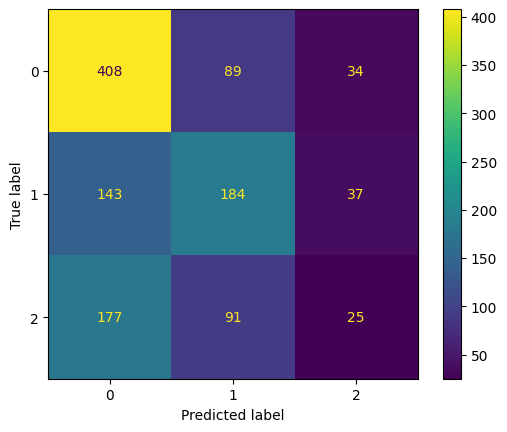

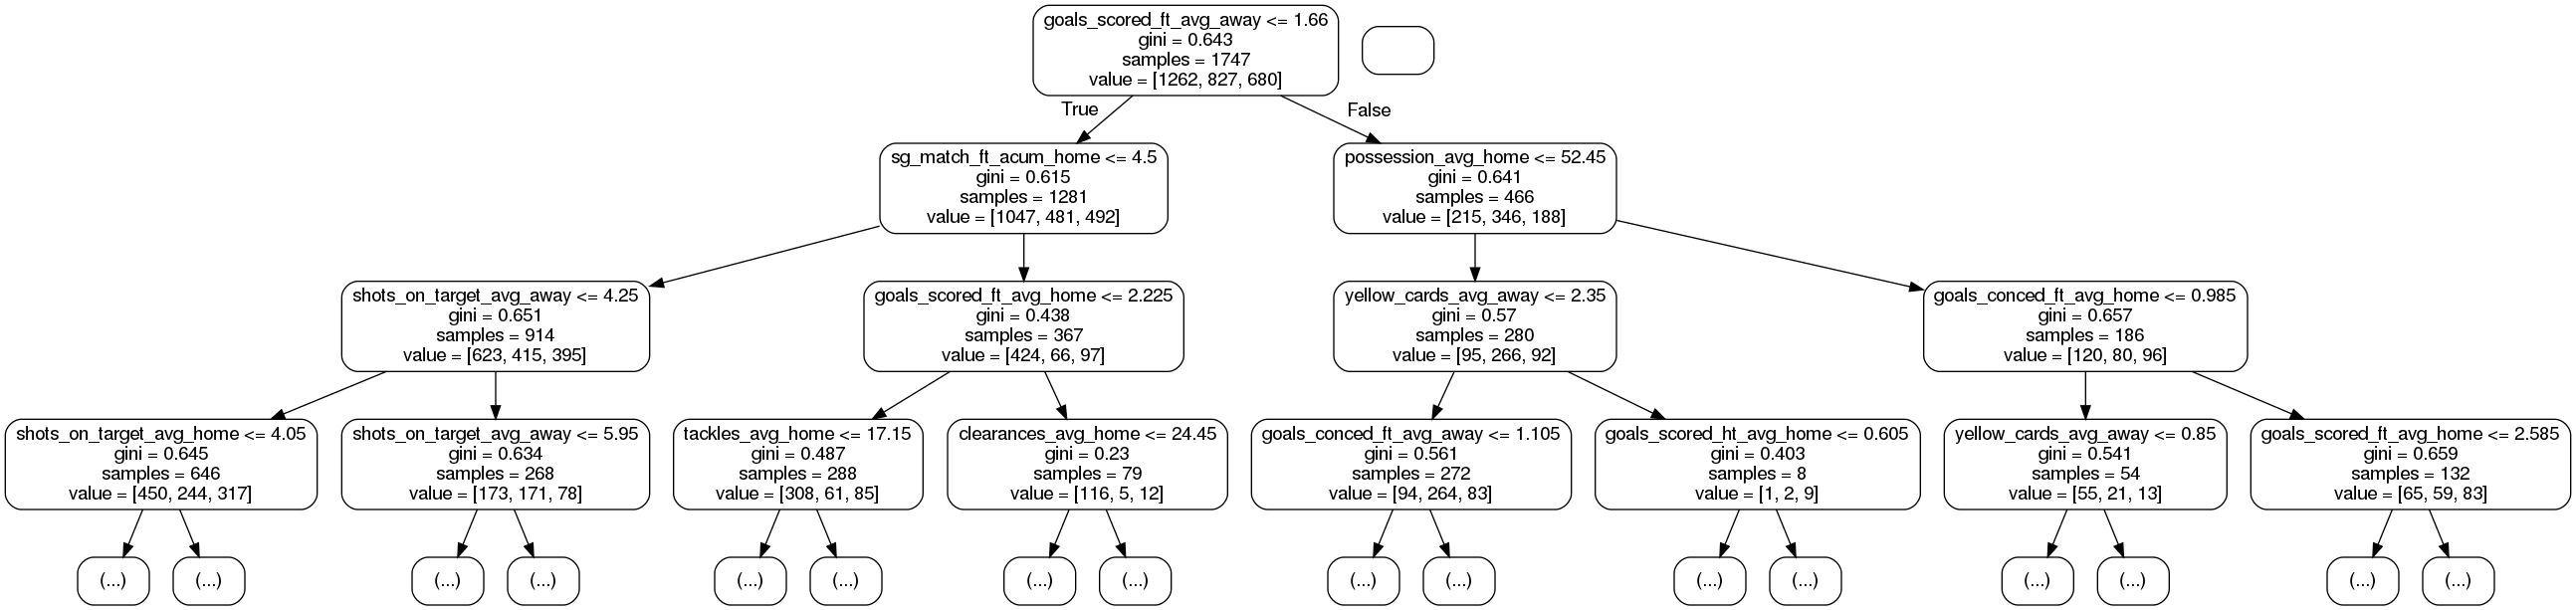

In [5]:
#

# seperate data in X, y
X = data_set_with_target.drop(columns=['target'])
y = data_set_with_target.target.values

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

max_features_methods = ['sqrt', 'log2', None]
number_of_trees = [i for i in range(3, 263 + 1, 20)]

# train three different Random Forest for different selection method and number of three, and plot oob score for them.
plt.figure()
for max_features_methods_i in max_features_methods:
    oob_scores = []
    trees_num = []
    for number_of_trees_i in number_of_trees:
        
        # classifier
        classifeir_rf = RandomForestClassifier(n_estimators=number_of_trees_i, max_features=max_features_methods_i, n_jobs=-1, oob_score=True, random_state=seed)
        # train classifier
        classifeir_rf.fit(X=X_train, y=y_train)
        # oob score
        oob_scores.append(classifeir_rf.oob_score_)
        # number of trees
        trees_num.append(number_of_trees_i)

    plt.plot(trees_num, oob_scores, label=max_features_methods_i if max_features_methods_i is not None else 'None')
    print('Average of {}: {}'.format(max_features_methods_i if max_features_methods_i is not None else 'None', np.average(oob_scores)))
    plt.legend()
    plt.xlabel('Number of Trees in RF')
    plt.ylabel('oob Score')

# best model obtained by oob score
classifeir_rf = RandomForestClassifier(n_estimators=263, max_features='sqrt', n_jobs=-1, oob_score=True, random_state=seed)
# train
classifeir_rf.fit(X=X_train, y=y_train)
# predict of test set
y_test_pred = classifeir_rf.predict(X=X_test)
# accuracy
accuracy1 = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('\n>  Accuracy on test set for best model: {}'.format(accuracy1))
# confusion matrix
confusion_mat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print('\n>  Confusion Matrix for best model:\n', confusion_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=classifeir_rf.classes_)
disp.plot()
plt.show()

# plot a tree from the forest
# Create DOT data
dot_data = export_graphviz(classifeir_rf.estimators_[0], out_file=None, rounded = True, max_depth=3, feature_names=X_train.columns)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())


**Written Answer:** 
- Which selection method yields a better generalization score? SQRT selection method in this question, generally according to the plotted oob cureved yeilds better results. For sqrt method on average it scored 0.4997, for log2 it scored 0.4958 on average, and for None it scored 0.4915 on average.

- Is this a good model? Baseline accuracy for the dataset as I calculated it in the previous sections is 0.4536. The obtained accuracy is better than the baseline by around 5 percent. Since oob score and accuracy on the test set is close, it indicates that we do not have overfit. However, it is probable that we could underfit the data. As confusion matrix shows there are big numbers outside of the diagonal which indicate our model does not do a good job and there is a posibilities for improvements.


### Q2.2 - <span style="color:red">[9]</span> - What are the 5 most important variables for the best (previous) model? Create a barplot reporting their importance scores based on Gini impurity.

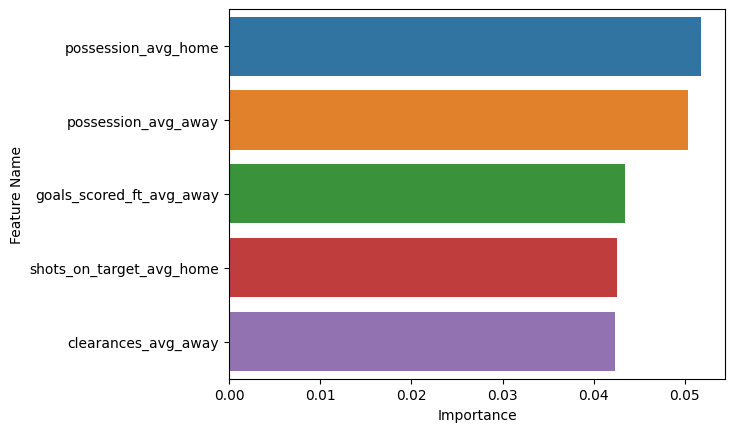

In [6]:
# Importance of features
feature_importance = np.array(classifeir_rf.feature_importances_)
feature_names = np.array(X_train.columns)

# sort 
index_sort = feature_importance.argsort()[::-1]
feature_importance = feature_importance[index_sort]
feature_names = feature_names[index_sort]

# bar plot
sns.barplot(x=feature_importance[0:5], y=feature_names[0:5])
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

### Q3.1 - <span style="color:red">[20]</span> - XGBoosting
Now we'll repeat the process for the XGB model, using an [```XGBClassifier``` object](https://xgboost.readthedocs.io/en/latest/python/python_api.html).

1. Use cross-validated grid search (with 5 stratified validation sets) to find the best values from the lists below for `XGBClassifier`. Use only 40% of the training set for your search, otherwise it will take a long time. Take advantage of `n_jobs=-1`. Report the optimal values found per argument.
 - Number of trees: [25, 50, 100]
 - Maximum depth: [8, 25, 42]
 - Learning rate: [0.1, 0.5, 0.9]
 
2. Train a `XGBClassifier` using the optimal values and report its accuracy as well as the confusion matrix. Store the accuracy in a variable called **accuracy2**.
3. Compare the confusion matrix and the accuracy of this model with the previous one. Is the performance of XGBoost better than the RandomForestClassifier in this case?

**Points will be deducted if your answer is not in the variable mentioned above.**

**Use random_state = seed in all the methods that take this argument.**

Fitting 5 folds for each of 27 candidates, totalling 135 fits

>  Best parameter found by grid search: {'learning_rate': 0.5, 'max_depth': 25, 'n_estimators': 50}


>  Accuracy of the best model of test set: 0.4663299663299663

>  Confusion Matrix:
[[353 101  77]
 [135 152  77]
 [154  90  49]]


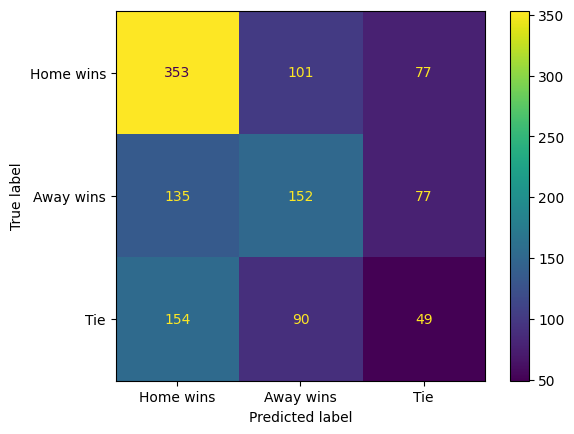

In [7]:
# search space
param_grid = dict({'n_estimators':[25, 50, 100], 'max_depth':[8, 25, 42], 'learning_rate':[0.1, 0.5, 0.9]})

# 5 fold
cv_folds = StratifiedKFold(n_splits=5)

# create valset
val_set = X_train.copy()
val_set['target'] = y_train.copy()
val_set = val_set.sample(frac=0.4, random_state=seed)
X_val = val_set.drop(columns=['target'])
y_val = val_set['target']

# base classifier
XGB_base = XGBClassifier(random_state=seed)

# define grid search
Grid_XGB = GridSearchCV(estimator=XGB_base, param_grid=param_grid, cv=cv_folds, scoring='accuracy', n_jobs=-1, refit=False, verbose=1)

# do grid search
Grid_XGB.fit(X=X_val, y=y_val)

# report best parameters
best_parameters = Grid_XGB.best_params_
print('\n>  Best parameter found by grid search: {}\n'.format(best_parameters))

# train with best classifier
XGB_base = XGBClassifier(
    n_estimators=best_parameters['n_estimators'],
    max_depth=best_parameters['max_depth'],
    learning_rate=best_parameters['learning_rate'],
    random_state=seed, n_jobs=-1)
XGB_base.fit(X=X_train, y=y_train)

# accuracy
y_test_pred = XGB_base.predict(X=X_test)
accuracy2 = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print("\n>  Accuracy of the best model of test set: {}".format(accuracy2))

# confusion matrix
print('\n>  Confusion Matrix:')
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))

ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_test_pred) , display_labels = ['Home wins', 'Away wins', 'Tie']).plot()
plt.show()


Answer: Accuracy for Random forest is higher and the diagonal elements in the random forest's confusion matrix have higher value. For this case Random Forest is better.

### Q3.2 - <span style="color:red">[4]</span> - **Written question:** How would you improve the accuracy of the models? Write no more than 5 sentences.

**Written Answer:** 

Different things can be done:

1- Feature engineering: Obtain better features by using current data in dataset or collect more features for current data and add to dataset


2- Hyperparameter tuning: We can do better hyperparameter tuning. Tune more paramtere and with bigger search space.


### Q3.3 - <span style="color:red">[9]</span> - What are the 5 most important variables for the XGB classifier? Create a barplot reporting their importance scores based on Gini impurity.

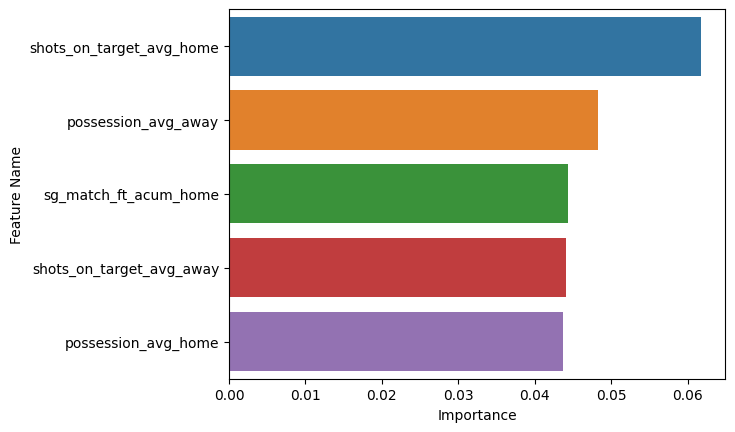

In [8]:
## Importance of features
feature_importance = np.array(XGB_base.feature_importances_)
feature_names = np.array(X_train.columns)

# sort 
index_sort = feature_importance.argsort()[::-1]
feature_importance = feature_importance[index_sort]
feature_names = feature_names[index_sort]

# bar plot
sns.barplot(x=feature_importance[0:5], y=feature_names[0:5])
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

Top 5 important faeture in this question and in the previous question are different because they use different method to obtain importance of features.